In [ ]:
# TODO: Replace the string "Your Name" and "DD.MM.YYYY" with the appropriate values.

from header import header
_ = header(student = "Your Name", date = "DD.MM.YYYY", task_no = 7)

# Pozitronová emisní tomografie

Tato laboratorní úloha představuje zjednodušeným způsobem velmi účinnou metodu lékařského zobrazování.
Pozitronová emisní tomografie (PET) se používá v lékařské diagnostice i v lékařském výzkumu v neurologii, onkologii, kardiologii a dalších oblastech medicíny.

PET lokalizuje místo vzniku gama fotonů v lidském těle.
Tyto fotony vznikají v důsledku anihilace pozitronů a elektronů.
Pozitrony jsou do těla zavedeny podáním radioaktivní látky a anihilují s elektrony atomů v tkáni.
Konfigurace systému detekce fotonů umožňuje 3D rekonstrukci rozložení podané radioaktivní látky v těle.
PET tak poskytuje obrazy tkání v závislosti na jejich schopnosti zachycovat tuto látku spíše než anatomické struktury.

Detektory jsou uspořádány v kruhu obklopujícím pacienta a registrují vylétávající anihilační fotony.
Detektory jsou vybaveny koincidenční elektronikou, takže jsou zaznamenávány pouze dvojice fotonů přilétávajících ve stejném čase.
Každý pár fotonů pak může být použit k sestavení přímky procházející tělem.
Použitím velkého počtu takových přímek lze rekonstruovat distribuci pozitronových zdrojů v objemu těla.

| **Izotop**   | $^{11}C$ | $^{13}N$ | $^{15}O$ | $^{18}F$ | 
| ------------- | -------- | -------- | -------- | -------- | 
| **Poločas** | 20 min   | 10 min   | 2 min    | 110 min  | 

Nejčastější radionuklidy pro PET jsou začleněny do běžných metabolitů, jako je glukóza nebo voda, a podávány pacientovi.
Radionuklidy je také možné začlenit do složitějších molekul, jako jsou léky, a použít PET ke sledování cesty léku v těle.

### Anihilace pozitronu

Pozitron je antičástice k elektronu.
Narozdíl od elektronu se v přírodě vyskytuje jen vzácně, protože rychle anihiluje s elektronem.
Během anihilace obě částice zmizí a vzniknou dva anihilační fotony.
Pozitrony jsou emitovány při $\beta^+$ rozpadu některých radioizotopů.
Při průchodu hmotou pozitrony nejprve ztratí svou kinetickou energii rozptylem, převážně na elektronech v okolní hmotě.
Když je kinetická energie pozitronu blízká nule, anihiluje s jedním z blízkých elektronů.
Obvykle trvá $10^{-7} - 10^{-10}$ s, než emitovaný pozitron anihiluje, a během této doby urazí nanejvýš několik desetin milimetru.
Například $^{22}\mathrm{Na}$ emituje pozitrony s energií nanejvýš 0,8 MeV a pozitron s touto energií urazí ve vodě maximálně 1 milimetr.
Při anihilaci elektron-pozitron vznikají dva fotony.
V případě, že pozitron i elektron mají kinetickou energii blízkou 0, je energie anihilačních fotonů rovna součtu klidových hmotností pozitronu a elektronu.
Zákon zachování hybnosti vyžaduje, aby celková hybnost fotonů byla prakticky nulová, a proto musí mít stejně velké, ale opačně orientované hybnosti.
Velikost hybnosti každého fotonu je $511~\mathrm{keV/c}$.
Střední volná dráha takových fotonů v tkáni je několik centimetrů a ve vodě 7,2 cm.

### Koincidenční měření

Fyzikální jevy prezentované v této úloze lze studovat koincidenčním měřením.
Toto měření je založeno na elektronickém koincidenčním bloku, který vydává signál pouze tehdy, když na vstupy [3] dorazí současně alespoň dva impulsy.
Koincidence fyzikálních jevů je rozmazána kvůli fluktuacím tvorby signálu v detektorech a časovému rozlišení koincidenční elektroniky.
Časové rozlišení pro koincidenční měření dvou nebo více současných jevů závisí především na rychlosti tvorby signálu v detektorech a u nejmodernější elektroniky dosahuje $10^{-6}$ až $10^{-12}$ s.
Koincidence vznikající detekcí obou fotonů z jediné anihilace nazýváme *skutečné koincidence*.
Pokud dva pozitrony anihilují náhodou v rámci koincidenčního časového okna, můžeme detekovat koincidenci vznikající v důsledku dvou různých anihilací.
Tyto koincidence se nazývají *falešné*.
Četnost falešných koincidencí $N_s$ lze vypočítat pomocí (nekorelovaných) četností signálu na dvou detektorech, $N_1$ a $N_2$, a šířky koincidenčního časového okna $\tau$:
$$
N_s = 2N_1N_2\tau
$$

Pokud máme více detektorů, bude výsledný vztah pro četnost falešných koincidencí vypadat takto:
$$
N_s = 2^{n-1}N_1N_2\dots N_n\tau^{n-1}
$$


### Uspořádání experimentu
**Obr. 1** ukazuje uspořádání experimentu a používané úhlové proměnné.
Zdroje pozitronů ($^{22}\mathrm{Na}$) jsou umístěny v plastovém držáku ve tvaru lebky, kterým se dá otáčet.
Úhel otočení lebky vzhledem ke stolu se měří úhloměrem pro plný rozsah $360\degree$ a pevnou šipkou označující směr na stole.
Dva Na(TI) scintilační detektory A a B se používají k detekci anihilačních fotonů.

Detektory mají konečné rozměry a konečné úhlové rozlišení - mohou detekovat fotony přicházející pod úhlem k ose detektoru.
Úhlový interval, ve kterém dochází k registraci fotonu se nazývá *úhlové rozlišení* a omezuje přesnost měření směru fotonů.
Signály z obou detektorů jsou - po zesílení a diskriminaci - přiváděny do koincidenčního bloku a dále do koincidenčního počítače.

**Obr. 1** Pozitronová emisní tomografie: uspořádání experimentu a používané úhlové proměnné.

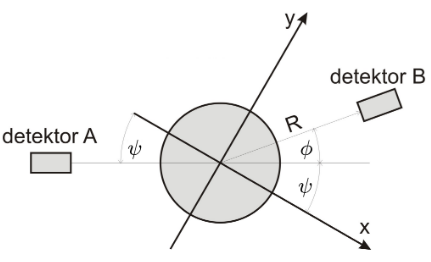

### Geometrie experimentu: souřadné systémy

**Obr. 1** znázorňuje dva souřadné systémy použité v našem experimentu.
První je polární systém souřadnic spojený se stolem.
Jeho počátek se shoduje s osou otáčení lebky, a zároveň s osou otáčení ramene, na kterém je upevněný detektor B.
V tomto systému jsou měřené souřadnice detektorů A a B.
Detektor A je nepohyblivý, a tedy má pevné souřadnice $(R, 180\degree)$.
Detektor B umístěný na otočném rameni délky $R$ má souřadnice $(R, \phi)$.
Druhý souřadný systém je kartézský a je spojen s modelem lebky.
Jeho počátek se shoduje s osou otáčení lebky.
Cílem této úlohy je určit polohu dvou zdrojů pozitronů vzhledem k této soustavě.
Souřadnice detektorů A a B v kartézské soustavě modelu otočené o $\psi$ vzhledem ke stolu jsou
$$
\begin{align}
 x_A = - R \cos{\psi} \quad & \quad x_B = R \cos{(\psi + \phi)} \\
 y_A = - R \sin{\psi} \quad & \quad  y_B = R \sin{(\psi + \phi)} 
\end{align}
$$
Rovnice přímky spojující detektory A a B v kartézské soustavě spojené s lebkou je
$$
(y_B - y_A)x - (x_B - x_A)y = (y_B - y_A)x_A - (x_B - x_A)y_A.
$$

### Data lebky

Nejprve připravíme data pro obrázek lebky, který použijeme ke zobrazení našich výsledků.

$\color{red}{\textbf{Úkol:}}$ Spusťte následující buňku pro načtení dat lebky.

In [1]:
# Solution.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Set the notebook directory. If you store the data in a different directory
# than this notebook, change the path accordingly.
A7_home = "."

# Read skull data from file for future use
data_x = []
data_y = []
with open(A7_home + "/skull_x_y.txt", "r") as infile:
    for line in infile:
        x, y = [float(s) for s in line.split()]
        data_x.append(x)
        data_y.append(y)
skull_data = pd.DataFrame({"x": data_x, "y": data_y})

# Měření s jediným pozitronovým zdrojem

V tomto pracovním úkolu předpokládáme, že anihilační fotony vznikají v jediném bodovém zdroji a vyletují v přesně opačných směrech.
V takovém případě pozorujeme skutečné koincidence, pokud se zdroj nachází na přímce spojující detektory A a B.



### Postup měření

Instruktor umístí jeden zdroj $^{22}\mathrm{Na}$ do modelu lebky.
Poté otočte model lebky na $\psi_1 = 0\degree$ a změřte rozdělení četnosti koincidencí v závislosti na úhlu $\phi$.
Poté otočte lebku na $\psi_2 = 90\degree$ a změřte rozdělení četnosti koincidencí opět v závislosti na $\phi$.
V obou případech měřte v dostatečně širokém intervalu úhlů $\phi$.
Polohy maxim těchto dvou rozdělení, $\phi_1$ a $\phi_2$, použijeme pro konstrukci přímek procházejících zdrojem.
Průsečík těchto přímek určí polohu zdroje v modelu lebky.

Akumulační čas nastavte pro každé měření četnosti na 20 s.

Formát dat musí být následující:
- text sestávající ze tří sloupců oddělených jedním, nebo několika prázdnými znaky (mezera, tabulátor)
- první sloupec: úhel $\psi$ ve stupních
- druhý sloupec: úhel $\phi$ ve stupních
- třetí sloupec: počet koincidencí $N$ zaznamenaný během akumulačního času 20 s
- první řádek musí obsahovat záhlaví sloupců `psi`, `phi` a `N` oddělené jedním, nebo několika prázdnými znaky (mezera, tabulátor); použijte přesně tato jména sloupců


$\color{red}{\textbf{Úkol:}}$ Změřte dvě úhlová rozdělení popsaná výše. Naměřená data pište do stringu `data_str` níže.

In [2]:
# Solution.

# TODO: Fill the string below with your data.
# The string will look like the following, but with many more lines, of course:
# data_str = """
# psi phi N
# 0   -35 5
# 0   -31 11
# 90  -35 6
# 90  -31 10
# """

data_str = """
psi	phi	N
0	-35	5
0	-31	9
0	-27	6
0	-23	6
0	-19	30
0	-17	57
0	-15	79
0	-13	117
0	-11	148
0	-9	127
0	-7	139
0	-5	119
0	-3	99
0	-1	83
0	1	58
0	5	17
0	9	3
90	-31	5
90	-27	3
90	-23	9
90	-19	40
90	-17	51
90	-15	84
90	-13	95
90	-11	144
90	-9	162
90	-7	149
90	-5	146
90	-3	157
90	-1	125
90	1	109
90	3	63
90	5	44
90	7	19
90	11	10
90	15	6
"""


$\color{red}{\textbf{Úkol:}}$ Ze stringu obsahujícího vaše data vytvořte pandas DataFrame `data_1`. Do něj přidejte také sloupec `err`, který bude obsahovat neurčitosti počtu koincidencí, které lze odhadnout jako $\sqrt{N}$. DataFrame `data_1` vypište jako tabulku.

In [3]:
# Solution.

from io import StringIO

# Create the pandas dataframe from the string above.
data_1 = pd.read_table(StringIO(data_str), sep = "\s+")

# Add a column with uncertainties in counts.
data_1["err"] = np.sqrt(data_1["N"])

# Print data_1 as a table.
print(data_1.rename(columns = {"psi": "psi [deg]", "phi": "phi [deg]", "N": "N", "err": "N_unc"}).to_string(index = False, max_rows = None))


# # ---------- SAFE TO IGNORE BELOW THIS LINE ----------
# # ALTERNATIVE SOLUTION: Read the data from a file.
# # The file has the same format as the `data_str` string above: three columns
# # with a header line. The columns are separated by whitespace (spaces or tabs).
# # The header line is: "psi phi N".

# # Path to the data file.
# data_file = A7_home + "/sample_data/set_A/Task1.txt"

# # Read the data of a single source angular profile from a file and convert to a pandas dataframe
# data_1 = pd.read_table(data_file, sep = "\s+")
# print(data_1.head())
# data_1["err"] = np.sqrt(data_1["N"])    # compute uncertainties in counts

 psi [deg]  phi [deg]   N     N_unc
         0        -35   5  2.236068
         0        -31   9  3.000000
         0        -27   6  2.449490
         0        -23   6  2.449490
         0        -19  30  5.477226
         0        -17  57  7.549834
         0        -15  79  8.888194
         0        -13 117 10.816654
         0        -11 148 12.165525
         0         -9 127 11.269428
         0         -7 139 11.789826
         0         -5 119 10.908712
         0         -3  99  9.949874
         0         -1  83  9.110434
         0          1  58  7.615773
         0          5  17  4.123106
         0          9   3  1.732051
        90        -31   5  2.236068
        90        -27   3  1.732051
        90        -23   9  3.000000
        90        -19  40  6.324555
        90        -17  51  7.141428
        90        -15  84  9.165151
        90        -13  95  9.746794
        90        -11 144 12.000000
        90         -9 162 12.727922
        90         -7 149 12

$\color{red}{\textbf{Úkol:}}$ Vykreslete naměřená data jako bodový graf četnosti koincidencí $N$ v závislosti na úhlu $\phi$ pro oba úhly $\psi$.

Text(0.5, 1.0, 'Angular profiles of coincidence rates: single source')

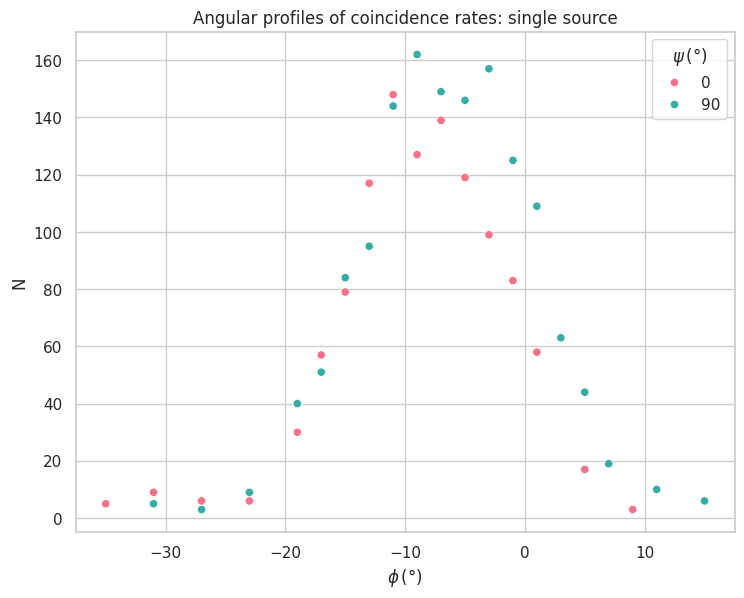

In [4]:
# Solution.

# Read the psi values that were used in the experiment.
psi_vals = data_1["psi"].unique()

# Plot the number of counts vs. phi for all psi values.
sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.scatterplot(data = data_1, x = "phi", y = "N", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
plt.xlabel("$\\phi\\,(\\degree)$")
plt.legend(title = "$\\psi\\,(\\degree)$")
plt.title("Angular profiles of coincidence rates: single source")

$\color{red}{\textbf{Úkol:}}$ Vysvětlete tvar naměřených úhlových rozdělení počtu koincidencí.


$\color{red}{\textbf{Řešení:}}$ 

### Fitování dat

Nyní určíme polohy maxim naměřených úhlových rozdělení.
Na každé úhlové rozdělení nafitujeme funkci, která je součtem normálního rozdělení a konstanty:
$$
f(\phi) = bg + amp \cdot \exp\left[-{1\over2}\left({\phi-mean}\over{width}\right)^2\right]
$$
Nafitované hodnoty parametrů `mean` použijeme jako náš odhad poloh maxim úhlových rozdělení.


$\color{red}{\textbf{Úkol:}}$ Úhlové rozdělení pro každou hodnotu $\psi$ nafitujte výše uvedenou funkcí.
Nafitované parametry a jejich neurčitosti uveďte v tabulce.


In [5]:
# Solution.

# Fit the data.
# Store the fit results in a dictionary `fits`.

from scipy.optimize import curve_fit

def gauss_plus_background(x, bg, amp, mean, w):
    """
    Function returning a gaussian with flat background, 
    Meaning of parameters is clear from the definition.
    """
    return bg + amp * np.exp(- 1/2 * ((x-mean)/w)**2)

psi_vals = data_1["psi"].unique() # psi values used
fits = dict.fromkeys(psi_vals)
for psi in psi_vals:
    data_psi = data_1[data_1["psi"] == psi]
    p_opt, p_cov = curve_fit(gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, p0 = [0, max(data_psi["N"]), 0, 20], 
                                   sigma = data_psi["err"].values, absolute_sigma = True)
    p_err = np.sqrt(np.diag(p_cov))
    errXerr = np.outer(p_err, p_err)
    p_corr = p_cov / errXerr
    fits[psi] = {"parameters": p_opt, "par_errors": p_err, "correlations" : p_corr}

# Print a table of results.
# Unicode works in pandas tables.
fits_table = pd.DataFrame({
    "𝜓 (⁰)" : psi_vals,
    "bg" : [fits[psi]["parameters"][0] for psi in psi_vals],
    "s(bg)" : [fits[psi]["par_errors"][0] for psi in psi_vals],
    "amp" : [fits[psi]["parameters"][1] for psi in psi_vals],
    "s(amp)" : [fits[psi]["par_errors"][1] for psi in psi_vals],
    "mean (⁰)" : [fits[psi]["parameters"][2] for psi in psi_vals],
    "s(mean) (⁰)" : [fits[psi]["par_errors"][2] for psi in psi_vals],
    "width (⁰)" : [fits[psi]["parameters"][3] for psi in psi_vals],
    "s(width) (⁰)" : [fits[psi]["par_errors"][3] for psi in psi_vals]
})
fits_table.style.format(precision = 2).set_caption("Parameters of Gaussian fits to  profiles of coincidence rates")

,𝜓 (⁰),bg,s(bg),amp,s(amp),mean (⁰),s(mean) (⁰),width (⁰),s(width) (⁰)
0,0,3.23,1.26,143.08,5.61,-8.15,0.22,6.01,0.23
1,90,2.88,1.30,162.64,5.64,-6.46,0.21,6.80,0.22


$\color{red}{\textbf{Úkol:}}$ Do DataFrame `data_1` přidejte:
- sloupec `N_fit`, který bude obsahovat hodnoty fitované funkce v bodech $\phi$,
- sloupec `residual`, který bude obsahovat veličinu $(N - N_\mathrm{fit}) / \sqrt{N_\mathrm{fit}}$, tzv. reziduály.

Do dictionary `fits` přidejte hodnotu $\chi^2$, `chisq` a počet stupňů volnosti, `df`, pro každý fit.

In [6]:
# Solution.

def add_fitted_to_data(data):
    '''
    Adds fitted values and residuals to data points.
    Also adds chi2 and df to the fits dictionary.
    '''
    result = data.copy()
    psi = np.mean(result["psi"])
    parameters = fits[psi]["parameters"]
    result["N_fit"] = gauss_plus_background(data["phi"], *parameters)
    result["residual"] = (result["N"] - result["N_fit"]) / np.sqrt(result["N_fit"])
    fits[psi]["chisq"] = sum(r**2 for r in result["residual"]) # Side effect!
    nrow, ncol = data.shape
    fits[psi]["df"] = nrow - 4
    return result

# Apply the function add_fitted_to_data.
data_1 = data_1.groupby("psi")[["psi", "phi", "N", "err"]].apply(add_fitted_to_data)
data_1.index = data_1.index.droplevel("psi")


$\color{red}{\textbf{Úkol:}}$ Naměřená data a nafitované funkce zobrazte v jednom grafu.

Text(0.5, 1.0, 'Gaussian fits to angular profiles of coincidence rates: single source')

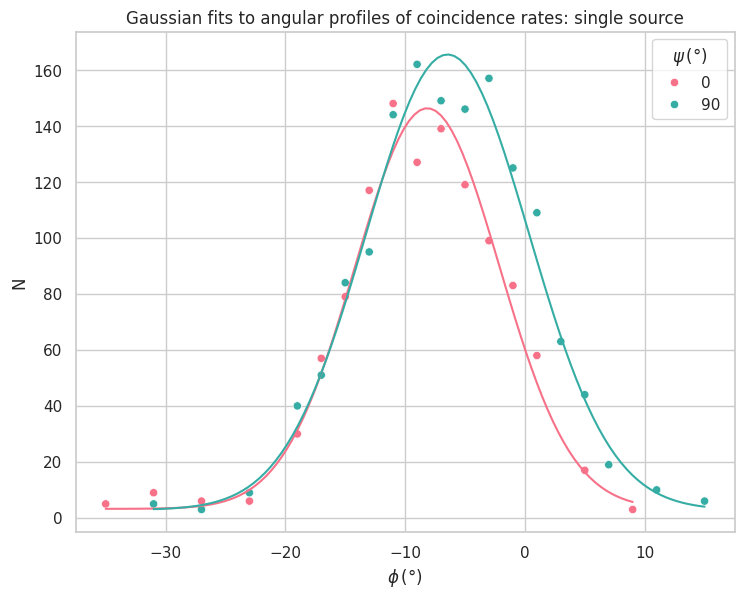

In [7]:
# Solution.

def make_fine_plot(data):
    '''
    Data to draw a fitted function plot
    '''
    psi = np.mean(data["psi"])
    parameters = fits[psi]["parameters"]
    x = np.linspace(min(data["phi"]), max(data["phi"]), 100)
    y = gauss_plus_background(x, *parameters)
    return pd.DataFrame({"psi": np.repeat(psi, 100), "phi": x, "N_fit": y})

fine_data = data_1.groupby("psi")[["psi", "phi", "N_fit"]].apply(make_fine_plot)

sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.scatterplot(data = data_1, x = "phi", y = "N", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = fine_data, x = "phi", y = "N_fit", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)
plt.xlabel("$\\phi\\,(\\degree)$")
plt.legend(title = "$\\psi\\,(\\degree)$")
plt.title("Gaussian fits to angular profiles of coincidence rates: single source")

### Diagnostické grafy

Nyní se budeme zabývat otázkou, zda je náš fit rozumný - zda zvolený model odpovídá naměřeným datům.

$\color{red}{\textbf{Úkol:}}$ Pro každý fit vypište hodnoty $\chi^2$ a počet stupňů volnosti.

In [8]:
# Solution.

# Print the chi2 and df values.
for psi in data_1["psi"].unique():
    chi2 = fits[psi]["chisq"]
    df = fits[psi]["df"]
    print(f"psi = {psi:3.0f} deg: chi2 = {chi2:6.1f}, df = {df:2d}, chi2/df = {chi2/df:5.2f}")

psi =   0 deg: chi2 =   24.2, df = 13, chi2/df =  1.86
psi =  90 deg: chi2 =   17.1, df = 15, chi2/df =  1.14


$\color{red}{\textbf{Úkol:}}$ Do jednoho grafu nakreslete reziduály pro každé úhlové rozdělení.

Text(0.5, 1.0, 'Residuals of gaussian fits to angular profiles')

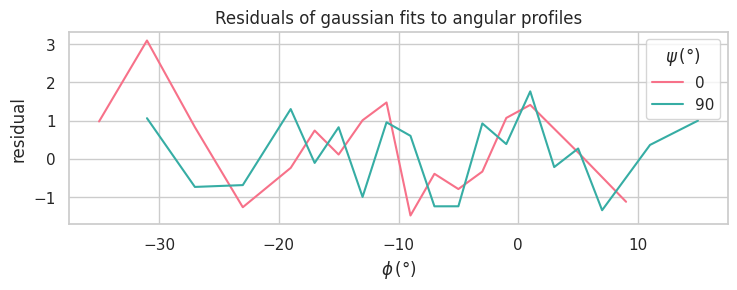

In [9]:
# Solution.

fig, ax = plt.subplots(figsize = [8.5, 2.5])
sns.lineplot(data = data_1, x = "phi", y = "residual", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), dashes = True, ax = ax)
plt.xlabel("$\\phi\\,(\\degree)$")
plt.legend(title = "$\\psi\\,(\\degree)$")
plt.title("Residuals of gaussian fits to angular profiles")

$\color{red}{\textbf{Úkol:}}$ Pro každé úhlové rozdělení nakreslete tzv. Quantile-Quantile (QQ) graf. Opět je cílem zjistit, jestli fitovaná funkce dobře popisuje naměřená data.

Text(0.5, 1.0, 'QQ plot for gaussian fits to angular profiles')

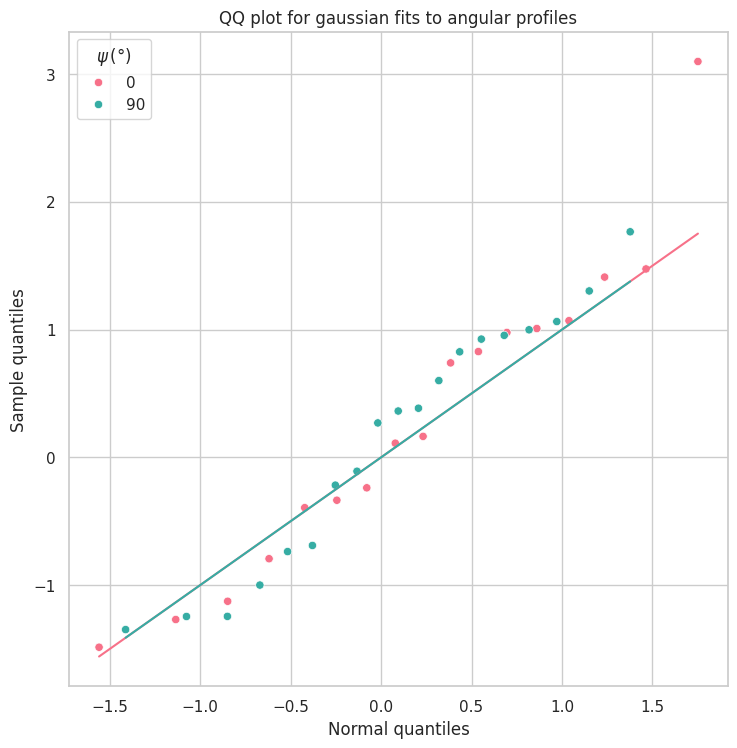

In [10]:
# Solution.

from scipy.stats import norm

def make_QQ_data(data):
    psi = np.mean(data["psi"]).astype(int)
    y = np.sort(data["residual"])
    mean, std = np.mean(y), np.std(y)
    ppf = norm(loc=mean, scale=std).ppf # Inverse CDF
    N = len(y)
    x = [ppf(i / (N+2)) for i in range(1,N+1)]
    nrow, ncol = data.shape
    return pd.DataFrame({"psi": np.repeat(psi, nrow), "x": x, "y": y})

qq_data = data_1.groupby("psi")[["psi", "residual"]].apply(make_QQ_data)
   
fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.scatterplot(data = qq_data, x = "x", y = "y", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = qq_data, x = "x", y = "x", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)

# Add labels
plt.xlabel('Normal quantiles')
plt.ylabel('Sample quantiles')
plt.legend(title = "$\\psi\\,(\\degree)$")
plt.title("QQ plot for gaussian fits to angular profiles")

$\color{red}{\textbf{Úkol:}}$ Diskutujte kvalitu fitu a tvar naměřených úhlových rozdělení. Odpovězte mj. na následující otázky:
- Je provedený fit dobrý? Mohl by být vylepšen?
- Jsou profily gaussovské, nebo existuje podstatná odchylka od gaussovskosti? Proč?

Hint: dobrý fit by měl splňovat následující kritéria:
- Redukovaný $\chi^2$ by měl být v rozumné blízkosti čísla 1.
- 95 % normalizovaných reziduálů by mělo být mezi -2 a 2.
- QQ graf by měl být přibližně lineární.


$\color{red}{\textbf{Řešení:}}$

### Výpočet polohy pozitronového zdroje

Z naměřených úhlových rozdělení jsme pomocí fitu určili polohy maxim, $\phi_1$ a $\phi_2$.
Máme tedy dvě dvojice ($\psi_1, \phi_1$) a ($\psi_2, \phi_2$), z nichž dostaneme rovnice dvou přímek.
Obě tyto přímky spojují detektor A, zdroj pozitronů a detektor B.

Nejprve si připomeňme, že rovnice každé přímky spojující detektory A a B v kartézské soustavě spojené s lebkou je
$$
(y_B - y_A)x - (x_B - x_A)y = (y_B - y_A)x_A - (x_B - x_A)y_A,
$$
kde souřadnice detektorů A a B jsou dány vztahem
$$
\begin{align}
 x_A = - R \cos{\psi} \quad & \quad x_B = R \cos{(\psi + \phi)} \\
 y_A = - R \sin{\psi} \quad & \quad  y_B = R \sin{(\psi + \phi)} 
\end{align}
$$


$\color{red}{\textbf{Úkol:}}$ Pro každou dvojici ($\psi_1, \phi_1$) a ($\psi_2, \phi_2$) vypočítejte polohy detektorů A a B v kartézské soustavě spojené s lebkou. Výsledky vypište v tabulce.

In [11]:
# Solution.

from uncertainties import *
import uncertainties.umath as umath

# Distance from the center of the skull to the detectors.
R = ufloat(15, 0.5) # We are not sure about the correct value, but the uncertainty translates directly to uncertainties in estimated positions

def to_xy(R, psi, phi):
    """
    For given angle positions of the skull and the movable detector arm gives 
    xy positions of centers of detector A and detector B.
    """
    rad = 3.1415926 / 180.0
    return -R * umath.cos(psi * rad),\
        -R * umath.sin(psi * rad),\
        R * umath.cos(psi * rad + phi * rad),\
        R * umath.sin(psi * rad + phi * rad)

# ------------------------------------------------------------------------------
# Convert fit parameters to random variables and set their correlations.
# This will help us propagate parameter uncertainties through calculations.
# ------------------------------------------------------------------------------

rv_fits = {} # contains line points as random variables
par_names = ["bg", "amp", "mean", "std"]
for psi, fit in fits.items():
    rv_list = []
    for par, err in zip(fit["parameters"], fit["par_errors"]):
        rv_list.append((par, err))
    rv_list = correlated_values_norm(rv_list, fit["correlations"])
    rv_fits[psi] = {par_names[i]: rv_list[i] for i in range(len(rv_list))}


# ------------------------------------------------------------------------------
# Get the positions of detectors A and B.
# ------------------------------------------------------------------------------

points = {} # collecting random variables
points_records = [] # collecting for table

for psi, par in rv_fits.items():
    ax, ay, bx, by = to_xy(R, psi, par["mean"])
    points[psi] = {"A": (ax, ay), "B": (bx, by)}
    points_records.append({
        "𝜓 (°)" : psi,
        "AB" : "A", 
        "x (cm)" : ax.nominal_value, 
        "𝑠ₓ (cm)" : ax.std_dev, 
        "y (cm)" : ay.nominal_value, 
        "𝑠ᵧ (cm)" : ay.std_dev,
    })
    points_records.append({
        "𝜓 (°)" : psi,
        "AB" : "B", 
        "x (cm)" : bx.nominal_value, 
        "𝑠ₓ (cm)" : bx.std_dev, 
        "y (cm)" : by.nominal_value, 
        "𝑠ᵧ (cm)" : by.std_dev,
    })

points_table = pd.DataFrame.from_records(points_records)

points_table.style.format(precision=2).set_caption("Estimated positions of detectors A and B")

,𝜓 (°),AB,x (cm),𝑠ₓ (cm),y (cm),𝑠ᵧ (cm)
0,0,A,-15.00,0.50,-0.00,0.00
1,0,B,14.85,0.50,-2.13,0.09
2,90,A,-0.00,0.00,-15.00,0.50
3,90,B,1.69,0.08,14.90,0.50


Nyní snadno odvodíme rovnice obou přímek. Pro jednoduchost hledání jejich průsečíku si koeficienty vystupující v obou přímkách přeznačíme následujícím způsobem:
$$
\begin{align}
a_{11}x + a_{12}y = b_1 \\
a_{21}x + a_{22}y = b_2.
\end{align}
$$
Souřadnice průsečíku, $(x,y)$, těchto dvou přímek můžeme najít řešením soustavy například pomocí Cramerova pravidla.
Toto řešení je odhadem polohy zdroje pozitronů v souřadnicovém systému lebky.

$\color{red}{\textbf{Úkol:}}$ Zkonstruujte rovnice obou přímek a najděte jejich průsečík. Souřadnice průsečíku a jejich neurčitosti vypište.

In [12]:
# Solution.

# X-points of pairs of lines: size-2 combinations of all psi measurements
from itertools import combinations

X_points = [] # for random variables
rows = [] # for a table
for psi1, psi2 in combinations(psi_vals, 2):
    ax1, ay1 = points[psi1]["A"]
    bx1, by1 = points[psi1]["B"]
    ax2, ay2 = points[psi2]["A"]
    bx2, by2 = points[psi2]["B"]
    a = by1 - ay1
    b = - bx1 + ax1
    c = a * ax1 + b * ay1
    d = by2 - ay2
    e = - bx2 + ax2
    f = d * ax2 + e * ay2
    Det = e * a - b * d
    x, y = (c * e - b * f)/Det, (a * f - c * d) / Det
    rows.append({
        "ψ₁ (⁰)": psi1, 
        "ψ₂ (⁰)": psi2, 
        "x (cm)": x.nominal_value, "𝑠ₓ (cm)": x.std_dev, "y (cm)": y.nominal_value, "𝑠ᵧ (cm)": y.std_dev
    })
    X_points.append(((c * e - b * f)/Det, (a * f - c * d) / Det))

X_table = pd.DataFrame.from_records(rows)

X_table.style.format(precision = 2).set_caption("Estimated crossing of lines through detectors")

,ψ₁ (⁰),ψ₂ (⁰),x (cm),𝑠ₓ (cm),y (cm),𝑠ᵧ (cm)
0,0,90,0.78,0.04,-1.12,0.05


$\color{red}{\textbf{Úkol:}}$ Zkonstruujte konfidenční elipsu pro souřadnice průsečíku (jedná se o pár náhodných proměnných s nejistotami).


In [13]:
# Solution.

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the confidence ellipse of *x* and *y*.
   :param x, y : uncertainties random variables (scalar)
   :param ax matplotlib.axes.Axes The Axes object to draw the ellipse into.
   :param n_std : float The number of standard deviations to determine the ellipse's radiuses.
   :param **kwargs Forwarded to `~matplotlib.patches.Ellipse`
   :return matplotlib.patches.Ellipse The ellipse object.
    """
  
    cov = correlation_matrix([x, y])
    pearson = cov[0, 1]
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculate the standard deviation of x from the square root of the variance and multiply
    # with the given number of standard deviations.
    scale_x = x.std_dev * n_std
    mean_x = x.nominal_value

    # calculate the standard deviation of y ...
    scale_y = y.std_dev * n_std
    mean_y = y.nominal_value

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

$\color{red}{\textbf{Úkol:}}$ Nakreslete lebku a vykreslete přímky spojující detektory A a B a jejich průsečík spolu s konfidenční elipsou.

Text(0.5, 1.0, 'Estimating the position of a single gamma source')

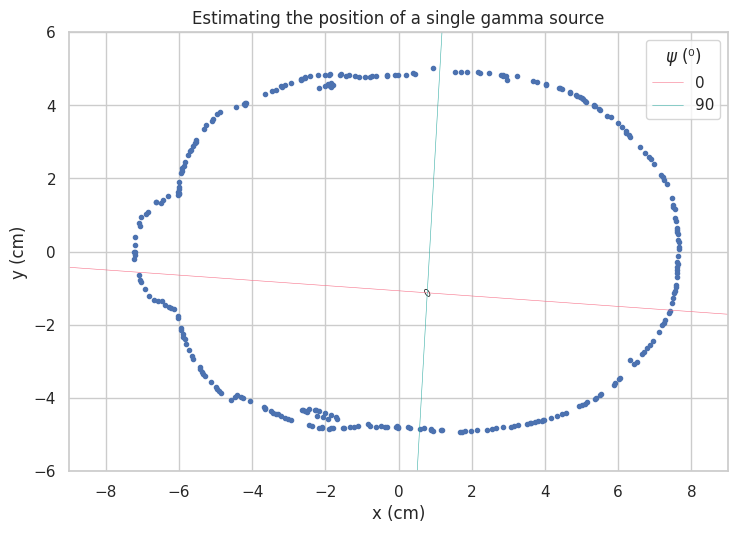

In [14]:
# Solution.

fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.lineplot(data = points_table, x = "x (cm)", y = "y (cm)", hue = "𝜓 (°)", linewidth = 0.4,
             palette = sns.color_palette("husl", len(psi_vals)))
ax.scatter(skull_data["x"], skull_data["y"], marker = ".")
confidence_ellipse(X_points[0][0], X_points[0][1], ax, n_std = 2, 
                   edgecolor = "black", linewidth = 0.5)
ax.set_aspect("equal")
plt.xlabel("x (cm)")
plt.xlim([-9, 9])
plt.ylabel("y (cm)")
plt.ylim([-6,6])
plt.legend(title = "$\\psi$ (⁰)")
plt.title("Estimating the position of a single gamma source")

$\color{red}{\textbf{Úkol:}}$ Diskutujte výhody a nevýhody použité metody na určení polohy zdroje pozitronů.
Diskutujte její přesnost a možnosti jejího zlepšení.
Odpovězte mj. na následující otázky:
- Jaká je přesnost měření? Můžeme se spolehnout na chyby fitovaných parametrů?
- Jak bychom mohli zlepšit přesnost? Co byste upřednostnili pro lepší odhad přesnosti měření:
    - Přidat další úhlové rozdělení (změřit při jiném $\psi$), nebo
    - Měřit úhlová rozdělení důkladněji (delší čas akumulace, menší úhlový krok)?

$\color{red}{\textbf{Řešení:}}$

---
# Měření se dvěma pozitronovými zdroji

V případě N pozitronových zdrojů pozorujeme superpozici N gaussovských distribucí. Pro dva zdroje tedy očekáváme bimodální distribuci se dvěma maximy.
1. Některé čáry se mohou křížit mimo lebku a taková křížení lze bezpečně ignorovat.
2. Pokud mají zdroje odlišnou aktivitu, můžeme identifikovat vrcholy v úhlových rozloženích patřících jednotlivým zdrojům.
3. V tomto notebooku použijeme oblasti spolehlivosti pro křížení k identifikaci těch, které jsou shodné v rámci chyby měření.

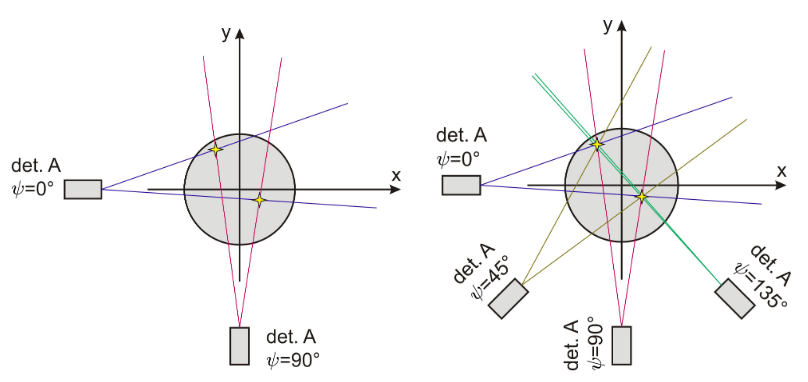

### Postup měření

1. Poté, co instruktor umístí druhý pozitronový zdroj do modelu lebky, změřte úhlové rozdělení počtu koincidencí v rozsahu úhlů $\phi$ a $\psi$ potřebném k nalezení poloh obou zdrojů.
2. Pomocí pravítka určete přibližnou polohu obou zdrojů pozitronů.
3. Proveďte podrobnou analýzu pomocí tohoto notebooku.


### Měření úhlových rozdělení

$\color{red}{\textbf{Úkol:}}$ Změřte úhlová rozdělení počtu koincidencí pro tři různé úhly natočení lebky vzhledem ke stolu: $\psi_1 = 0\degree$, $\psi_2 = 90\degree$, $\psi_3 = 120\degree$. Naměřená data pište do stringu `data_str` níže; jeho formát je stejný jako v předchozí části.

In [15]:
# Solution.

# TODO: Fill the string below with your data.
# The string will look like the following, but with many more lines, of course:
# data_str = """
# psi phi N
# 0   -35 5
# 0   -31 11
# 90  -35 6
# 90  -31 10
# 120 -35 6
# 120 -31 10
# """

data_str = """
psi	phi	N
0	-35	6
0	-30	6
0	-25	7
0	-20	25
0	-15	97
0	-10	126
0	-5	140
0	0	72
0	5	43
0	10	28
0	15	101
0	20	189
0	25	189
0	30	133
0	35	51
0	40	14
90	-35	8
90	-30	6
90	-25	7
90	-20	39
90	-15	132
90	-10	276
90	-5	296
90	0	222
90	5	76
90	10	17
90	15	10
90	20	8
90	25	4
90	30	3
90	35	7
90	40	7
120	-35	15
120	-30	30
120	-25	96
120	-20	165
120	-15	195
120	-10	195
120	-5	158
120	0	167
120	5	94
120	10	54
120	15	27
120	20	5
120	25	3
120	30	8
120	35	5
120	40	9
"""


$\color{red}{\textbf{Úkol:}}$ Ze stringu obsahujícího vaše data vytvořte pandas DataFrame `data_2`. Do něj přidejte také sloupec `err`, který bude obsahovat neurčitosti počtu koincidencí, které lze odhadnout jako $\sqrt{N}$. DataFrame `data_2` vypište jako tabulku.

In [16]:
# Solution.

from io import StringIO

# Create the pandas dataframe from the string above.
data_2 = pd.read_table(StringIO(data_str), sep = "\s+")

# Add a column with uncertainties in counts.
data_2["err"] = np.sqrt(data_2["N"])

# Print data_2 as a table.
print(data_2.rename(columns = {"psi": "psi [deg]", "phi": "phi [deg]", "N": "N", "err": "N_unc"}).to_string(index = False, max_rows = None))


# # ---------- SAFE TO IGNORE BELOW THIS LINE ----------
# # ALTERNATIVE SOLUTION: Read the data from a file.
# # The file has the same format as the `data_str` string above: three columns
# # with a header line. The columns are separated by whitespace (spaces or tabs).
# # The header line is: "psi phi N".

# # Path to the data file.
# data_file = A7_home + "/sample_data/set_A/Task2.txt"

# # Read the data of a single source angular profile from a file and convert to a pandas dataframe
# data_2 = pd.read_table(data_file, sep = "\s+")
# print(data_2.head())
# data_2["err"] = np.sqrt(data_2["N"])    # compute uncertainties in counts

 psi [deg]  phi [deg]   N     N_unc
         0        -35   6  2.449490
         0        -30   6  2.449490
         0        -25   7  2.645751
         0        -20  25  5.000000
         0        -15  97  9.848858
         0        -10 126 11.224972
         0         -5 140 11.832160
         0          0  72  8.485281
         0          5  43  6.557439
         0         10  28  5.291503
         0         15 101 10.049876
         0         20 189 13.747727
         0         25 189 13.747727
         0         30 133 11.532563
         0         35  51  7.141428
         0         40  14  3.741657
        90        -35   8  2.828427
        90        -30   6  2.449490
        90        -25   7  2.645751
        90        -20  39  6.244998
        90        -15 132 11.489125
        90        -10 276 16.613248
        90         -5 296 17.204651
        90          0 222 14.899664
        90          5  76  8.717798
        90         10  17  4.123106
        90         15  10  3

$\color{red}{\textbf{Úkol:}}$ Vykreslete naměřená data jako bodový graf četnosti koincidencí $N$ v závislosti na úhlu $\phi$ pro všechny úhly $\psi$.

Text(0.5, 1.0, 'Angular profiles of coincidence rates, 2 sources')

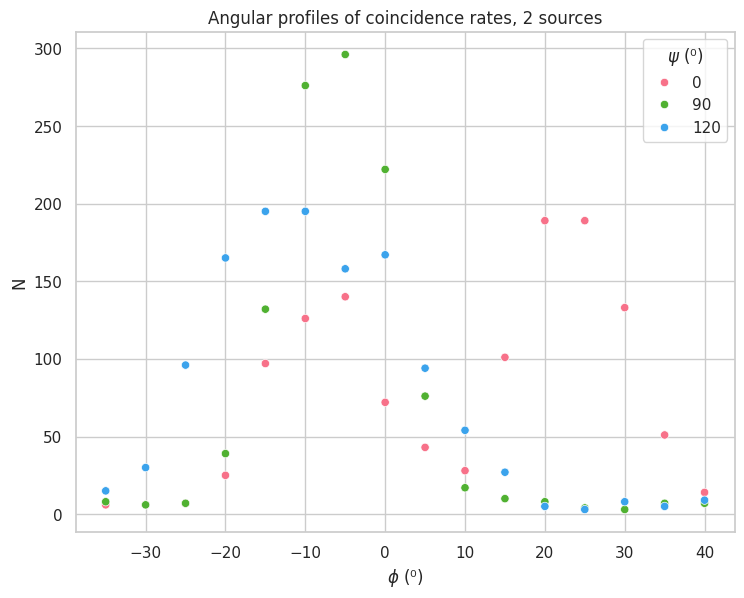

In [17]:
# Solution.

psi_vals = data_2["psi"].unique() # Replace psi with these values

fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.scatterplot(data = data_2, x = "phi", y = "N", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
plt.xlabel("$\\phi$ (⁰)")
plt.legend(title = "$\\psi$ (⁰)")
plt.title("Angular profiles of coincidence rates, 2 sources")

$\color{red}{\textbf{Úkol:}}$ Vysvětlete tvar naměřených úhlových rozdělení počtu koincidencí.


$\color{red}{\textbf{Řešení:}}$

### Fitování dat

Nyní určíme polohy maxim naměřených úhlových rozdělení.
Budeme je odhadovat pomocí fitování.
Fity jsou nyní ovšem poněkud komplikované, protože někdy máme jasně bimodální distribuci a někdy jsou oba zdroje blízko sebe a distribuce vypadá jako jediný široký peak. V takovém případě budeme muset fity nastavit ručně.

Pokud některý fit vyjde špatně, podívejte se na graf naměřených úhlových rozdělení a upravte počáteční podmínky tak, aby odpovídaly tomu, co v něm vidíte.

$\color{red}{\textbf{Úkol:}}$ Na každé úhlové rozdělení nafitujte funkci, která je součtem dvou normálních rozdělení a konstanty. Nejprve nastavte počáteční podmínky pro každý fit podle toho, co vidíte v grafu naměřených dat. Počáteční podmínky definujte v stringu `initial_guess_str` níže. O hodnoty úhlu $\psi$ se nestarejte, ty budou načteny z DataFrame `data_2` později; prozatím použijte libovolné hodnoty. Pokud chcete, aby fitovaná funkce pro některé rozdělení obsahovala pouze jeden gaussián, nastavte amplitudu druhého gaussiánu `amp2` na nulu. Výsledky fitů uveďte v tabulce.
```

In [18]:
# Solution.

# TODO: Replace values in the string `initial_guess_str`` with your initial guesses for fit parameters.
initial_guess_str = '''
psi bg amp1 mean1 width1 amp2 mean2 width2
psi1 5 100 -15 6 100 5 6
psi1 5 100 -5 6 0 5 6
psi1 5 100 -15 6 100 5 6
'''

psi_vals = data_2["psi"].unique() # Replace psi with these values
initial_guess = pd.read_csv(StringIO(initial_guess_str), sep = "\s+")
initial_guess["psi"] = psi_vals
initial_guess = initial_guess.set_index("psi")
initial_guess = initial_guess.sort_index()  # Sorting the DataFrame by the index (psi) for clarity
initial_guess = initial_guess.reset_index()
initial_guess.style.format(precision=2).set_caption("Parameters of fits to angular profiles of coincidence rates")


# ------------------
# Fitting.
# ------------------

def double_gauss_plus_background(x, bg, amp1, mean1, sig1, amp2, mean2, sig2):
    """
    Function returning a double gaussian with flat background, 
    Meaning of parameters is clear from the definition.
    """
    return bg + amp1 * np.exp(- 1/2 * ((x-mean1)/sig1)**2) + amp2 * np.exp(- 1/2 * ((x-mean2)/sig2)**2)

fits = dict.fromkeys(psi_vals)
for psi in psi_vals:
    data_psi = data_2[data_2["psi"] == psi]
    mid = np.sum(data_psi["phi"] * data_psi["N"]) / np.sum(data_psi["N"])
    top = max(data_psi["N"])
    bounds = ([0, 0,-np.inf, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
    x_scale = (5, 200, 20, 7, 200, 20, 7)
    initial_guess_psi = initial_guess[initial_guess["psi"] == psi].values[0][1:] 
    if initial_guess_psi[4] != 0: # Two component fit is requested
        try:
            p_opt, p_cov = curve_fit(double_gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, 
                        p0 = initial_guess_psi, 
                        sigma = data_psi["err"].values, absolute_sigma = True, bounds = bounds, x_scale = x_scale)
        except (RuntimeError, ValueError, OptimizeWarning) as e:
            print(e)
            print("Reverting to single fit for psi = ", psi)
            bounds = (bounds[0][:4], bounds[1][:4])
            x_scale = x_scale[:4]
            p_opt, p_cov = curve_fit(gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, 
                        p0 = initial_guess_psi[:4],
                        sigma = data_psi["err"].values, absolute_sigma = True)
    else:
        bounds = (bounds[0][:4], bounds[1][:4])
        x_scale = x_scale[:4]
        p_opt, p_cov = curve_fit(gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, 
                        p0 = initial_guess_psi[:4], 
                        sigma = data_psi["err"].values, absolute_sigma = True) 

    p_err = np.sqrt(np.diag(p_cov))
    errXerr = np.outer(p_err, p_err)
    p_corr = p_cov / errXerr
    if len(p_opt) == 4:
        p_opt = np.asarray([*p_opt, None, None, None])
        p_err = np.asarray([*p_err, None, None, None])
    fits[psi] = {"parameters": p_opt, "par_errors": p_err, "correlations" : p_corr}

# No units in the header, since the table would be too broad.
fits_table = pd.DataFrame({
    "𝜓 (°)" : psi_vals,
    "bg" : [fits[psi]["parameters"][0] for psi in psi_vals],
    "𝑠₍bg₎" : [fits[psi]["par_errors"][0] for psi in psi_vals],
    "amp1" : [fits[psi]["parameters"][1] for psi in psi_vals],
    "𝑠(amp1)" : [fits[psi]["par_errors"][1] for psi in psi_vals],
    "mean1" : [fits[psi]["parameters"][2] for psi in psi_vals],
    "𝑠(mean1)" : [fits[psi]["par_errors"][2] for psi in psi_vals],
    "width1" : [fits[psi]["parameters"][3] for psi in psi_vals],
    "𝑠(width1)" : [fits[psi]["par_errors"][3] for psi in psi_vals],
    "amp2" : [fits[psi]["parameters"][4] for psi in psi_vals],
    "𝑠(amp2)" : [fits[psi]["par_errors"][4] for psi in psi_vals],
    "mean2" : [fits[psi]["parameters"][5] for psi in psi_vals],
    "𝑠(mean2)" : [fits[psi]["par_errors"][5] for psi in psi_vals],
    "width2" : [fits[psi]["parameters"][6] for psi in psi_vals],
    "𝑠(width2)" : [fits[psi]["par_errors"][6] for psi in psi_vals]
})
fits_table.style.format(precision = 2).set_caption("Parameters of fits to angular profiles of coincidence rates")

,𝜓 (°),bg,𝑠₍bg₎,amp1,𝑠(amp1),mean1,𝑠(mean1),width1,𝑠(width1),amp2,𝑠(amp2),mean2,𝑠(mean2),width2,𝑠(width2)
0,0,4.82,1.61,140.70,8.51,-7.52,0.36,6.62,0.34,201.79,10.10,23.49,0.29,6.64,0.25
1,90,5.27,0.84,314.98,12.37,-6.15,0.22,6.48,0.17,nan,nan,nan,nan,nan,nan
2,120,4.86,1.12,178.33,25.36,-16.14,1.84,7.33,0.85,129.15,25.95,-0.50,2.46,7.40,1.13


$\color{red}{\textbf{Úkol:}}$ Do DataFrame `data_2` přidejte:
- sloupec `N_fit`, který bude obsahovat hodnoty fitované funkce v bodech $\phi$,
- sloupec `residual`, který bude obsahovat veličinu $(N - N_\mathrm{fit}) / \sqrt{N_\mathrm{fit}}$, tzv. reziduály.

Do dictionary `fits` přidejte hodnotu $\chi^2$, `chisq` a počet stupňů volnosti, `df`, pro každý fit.

In [19]:
# Solution.

def add_fitted_to_data(data):
    '''
    Adds fitted values and residuals to data points.
    Also adds chi2 and df to the fits dictionary.
    '''
    result = data.copy()
    psi = np.mean(result["psi"])
    parameters = fits[psi]["parameters"]
    if parameters[4] is None:
        result["N_fit"] = gauss_plus_background(data["phi"], *parameters[:4])
    else:
        result["N_fit"] = double_gauss_plus_background(data["phi"], *parameters)
    result["residual"] = (result["N"] - result["N_fit"]) / np.sqrt(result["N_fit"])
    fits[psi]["chisq"] = sum(r**2 for r in result["residual"]) # side effect !
    nrow, ncol = data.shape
    fits[psi]["df"] = nrow - len(parameters)
    return result

data_2 = data_2.groupby("psi")[["psi", "phi", "N", "err"]].apply(add_fitted_to_data)
data_2.index = data_2.index.droplevel("psi")
print(data_2.head())

   psi  phi   N       err      N_fit  residual
0    0  -35   6  2.449490   4.847282  0.523569
1    0  -30   6  2.449490   5.265391  0.320141
2    0  -25   7  2.645751   9.148219 -0.710249
3    0  -20  25  5.000000  28.675774 -0.686422
4    0  -15  97  9.848858  79.205287  1.999466


$\color{red}{\textbf{Úkol:}}$ Naměřená data a nafitované funkce zobrazte v jednom grafu.

Text(0.5, 1.0, 'Gaussian fits to angular profiles of coincidence rates')

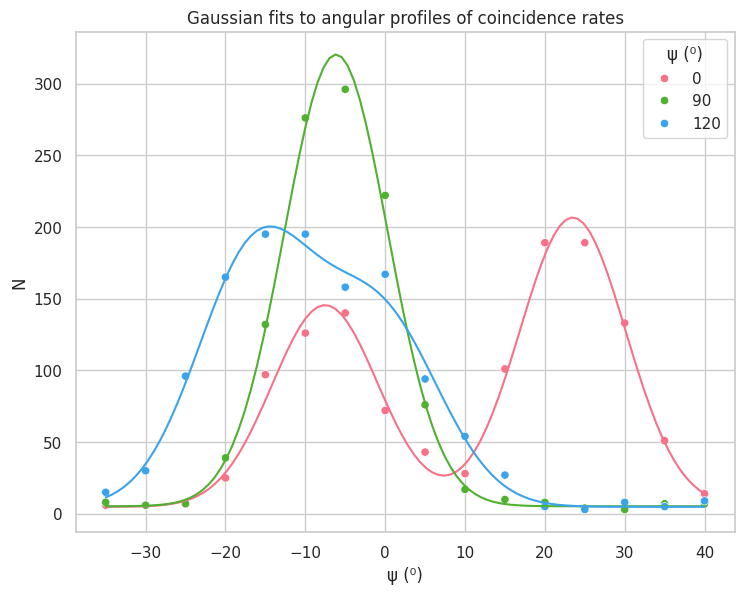

In [20]:
# Solution.

def make_fine_plot(data):
    '''
    Data to draw a fitted function plot
    '''
    psi = np.mean(data["psi"]).astype(int)
    parameters = fits[psi]["parameters"]
    x = np.linspace(min(data["phi"]), max(data["phi"]), 100)
    if parameters[4] is None:
        y = gauss_plus_background(x, *parameters[:4])
    else:
        y = double_gauss_plus_background(x, *parameters)
    return pd.DataFrame({"psi": np.repeat(psi, 100), "phi": x, "N_fit": y})

fine_data = data_2.groupby("psi")[["psi", "phi", "N_fit"]].apply(make_fine_plot)

fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.scatterplot(data = data_2, x = "phi", y = "N", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = fine_data, x = "phi", y = "N_fit", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)
plt.xlabel("ψ (⁰)")
plt.legend(title = "ψ (⁰)")
plt.title("Gaussian fits to angular profiles of coincidence rates")

### Diagnostické grafy

Nyní se budeme zabývat otázkou, zda jsou naše fity rozumné - zda zvolený model odpovídá naměřeným datům.

$\color{red}{\textbf{Úkol:}}$ Pro každý fit vypište hodnoty $\chi^2$ a počet stupňů volnosti.

In [21]:
# Solution.

# Print the chi2 and df values.
for psi in data_2["psi"].unique():
    chi2 = fits[psi]["chisq"]
    df = fits[psi]["df"]
    print(f"psi = {psi:3.0f} deg: chi2 = {chi2:6.1f}, df = {df:2d}, chi2/df = {chi2/df:5.2f}")

psi =   0 deg: chi2 =   13.3, df =  9, chi2/df =  1.47
psi =  90 deg: chi2 =   10.5, df =  9, chi2/df =  1.17
psi = 120 deg: chi2 =   17.0, df =  9, chi2/df =  1.89


$\color{red}{\textbf{Úkol:}}$ Do jednoho grafu nakreslete reziduály pro každé úhlové rozdělení.

Text(0.5, 1.0, 'Residuals of gaussian fits to angular profiles')

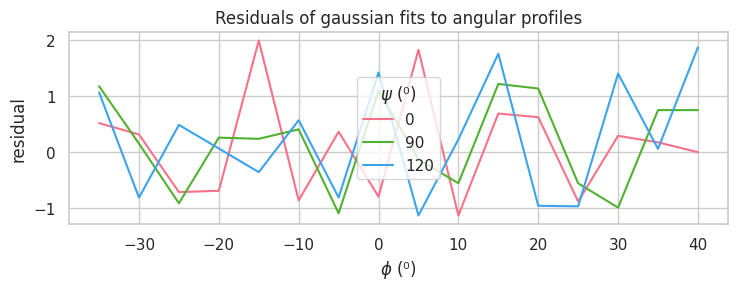

In [22]:
# Solution.

fig, ax = plt.subplots(figsize = [8.5, 2.5])
sns.lineplot(data = data_2, x = "phi", y = "residual", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), dashes = True, ax = ax)
plt.xlabel("$\\phi$ (⁰)")
plt.legend(title = "$\\psi$ (⁰)")
plt.title("Residuals of gaussian fits to angular profiles")

$\color{red}{\textbf{Úkol:}}$ Pro každé úhlové rozdělení nakreslete tzv. Quantile-Quantile (QQ) graf. Opět je cílem zjistit, jestli fitované funkce dobře popisují naměřená data.

Text(0.5, 1.0, 'QQ plot for gaussian fits to angular profiles')

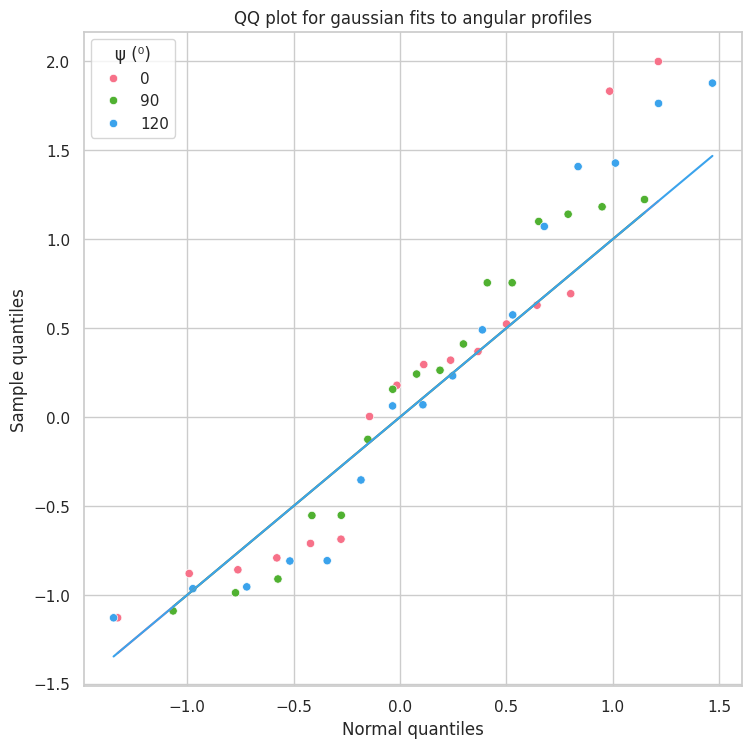

In [23]:
def make_QQ_data(data):
    psi = np.mean(data["psi"]).astype(int)
    y = np.sort(data["residual"])
    mean, std = np.mean(y), np.std(y)
    ppf = norm(loc=mean, scale=std).ppf # Inverse CDF
    N = len(y)
    x = [ppf(i / (N+2)) for i in range(1,N+1)]
    nrow, ncol = data.shape
    return pd.DataFrame({"psi": np.repeat(psi, nrow), "x": x, "y": y})

qq_data = data_2.groupby("psi")[["psi", "residual"]].apply(make_QQ_data)
   
fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.scatterplot(data = qq_data, x = "x", y = "y", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = qq_data, x = "x", y = "x", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)

# Add labels
plt.xlabel('Normal quantiles')
plt.ylabel('Sample quantiles')
plt.legend(title = "ψ (⁰)")
plt.title("QQ plot for gaussian fits to angular profiles")

$\color{red}{\textbf{Úkol:}}$ Diskutujte kvalitu fitů a tvary naměřených úhlových rozdělení. Pokud je nějaký fit špatný, přenastavte pro něj počáteční hodnoty ve stringu `initial_guess_str` výše a vše spusťte znovu. Odpovězte mj. na následující otázky:
- Jsou provedené fity dobré? Mohly by být vylepšeny?
- Jsou profily gaussovské, nebo existuje podstatná odchylka od gaussovskosti? Proč?

Hint: dobrý fit by měl splňovat následující kritéria:
- Redukovaný $\chi^2$ by měl být v rozumné blízkosti čísla 1.
- 95 % normalizovaných reziduálů by mělo být mezi -2 a 2.
- QQ graf by měl být přibližně lineární.
- standardní chyby parametrů by měly být rozumně nízké, tj. *ne* několikrát větší než hodnota parametru

V případě špatného fitu je obvyklým řešením použít jediný gaussián namísto dvou, pokud data neumožňují nafitovat součet dvou gaussiánů. 


$\color{red}{\textbf{Řešení:}}$

### Výpočet poloh pozitronových zdrojů

Začneme převedením parametrů fitu na (korelované) polohy zdrojů.

*Poznámka*: Dvě polohy detektoru B odpovídající dvěma gaussovským vrcholům jsou v textu i kódu níže označeny jako B a C.

$\color{red}{\textbf{Úkol:}}$ Vypočítejte polohy detektorů A a B v kartézské soustavě spojené s lebkou. Pro detektor B budete mít dvě polohy u rozdělení, která obsahovala dvě maxima. Výsledky vypište v tabulce.

In [24]:
# Solution.

# ------------------------------------------------------------------------------
# Convert fit parameters to random variables and set their correlations.
# This will help us propagate parameter uncertainties through calculations.
# ------------------------------------------------------------------------------

rv_fits = {} # contains line points as random variables
par_names = ["bg", "amp1", "mean1", "std1", "amp2", "mean2", "std2"]
for psi, fit in fits.items():
    rv_list = []
    for par, err in zip(fit["parameters"], fit["par_errors"]):
        if par:
            rv_list.append((par, err))
    rv_list = correlated_values_norm(rv_list, fit["correlations"])
    rv_fits[psi] = {par_names[i]: rv_list[i] for i in range(len(rv_list))}


# ------------------------------------------------------------------------------
# Get the positions of detectors A and B.
# ------------------------------------------------------------------------------

points = {} # to collect random vaariables
records = [] # to collect data for a table

for psi, par in rv_fits.items():
    # Order here is CAB or AB, depending on whether we have two peaks or one
    # Simplifies line plotting. 
    try:
        ax, ay, cx, cy = to_xy(R, psi, par["mean2"])
        records.append({
            "ψ (⁰)" : psi,
            "ABC" : "C",
            "x (cm)" : cx.nominal_value,
            "𝑠ₓ (cm)" : cx.std_dev,
            "y (cm)" : cy.nominal_value,
            "𝑠ᵧ (cm)" : cy.std_dev
        })
        points[psi] = {"C": (cx, cy)}
        C_str = f"C: x={cx.nominal_value:.2f}+/-{cx.std_dev:.2f}, y={cy.nominal_value:.2f}+/-{cy.std_dev:.2f}"
    except KeyError:
        points[psi] = {}  
        C_str = ""
    ax, ay, bx, by = to_xy(R, psi, par["mean1"])
    records.append({
            "ψ (⁰)" : psi,
            "ABC" : "A",
            "x (cm)" : ax.nominal_value,
            "𝑠ₓ (cm)" : ax.std_dev,
            "y (cm)" : ay.nominal_value,
            "𝑠ᵧ (cm)" : ay.std_dev
        })
    records.append({
            "ψ (⁰)" : psi,
            "ABC" : "B",
            "x (cm)" : bx.nominal_value,
            "𝑠ₓ (cm)" : bx.std_dev,
            "y (cm)" : by.nominal_value,
            "𝑠ᵧ (cm)" : by.std_dev
        })
    points[psi].update({"A": (ax, ay), "B": (bx, by)})
    
points_table = pd.DataFrame.from_records(records)
points_table.sort_values(by = ["ψ (⁰)", "ABC"])\
    .style.format(precision = 2)\
    .set_caption("Estimated positions of detectors A and B/C")

,ψ (⁰),ABC,x (cm),𝑠ₓ (cm),y (cm),𝑠ᵧ (cm)
1,0,A,-15.00,0.50,-0.00,0.00
2,0,B,14.87,0.50,-1.96,0.12
0,0,C,13.76,0.46,5.98,0.21
3,90,A,-0.00,0.00,-15.00,0.50
4,90,B,1.61,0.08,14.91,0.50
6,120,A,7.50,0.25,-12.99,0.43
7,120,B,-3.59,0.48,14.56,0.50
5,120,C,-7.39,0.61,13.06,0.54


$\color{red}{\textbf{Úkol:}}$ Pro každý úhel natočení lebky $\psi$ a každou polohu detektoru B (B a C) zkonstruujte rovnice přímek spojujících detektory A a B v kartézské soustavě spojené s lebkou. Nalezněte průsečíky těchto přímek a vypište je v tabulce spolu s jejich neurčitostmi.

In [25]:
# Solution.

# lines connecting AB and AC for each psi
lines = {}
for psi in psi_vals:
    ax1, ay1 = points[psi]["A"]
    bx1, by1 = points[psi]["B"]
    a = by1 - ay1
    b = - bx1 + ax1
    c = a * ax1 + b * ay1
    lines[psi] = {"AB" : (a, b, c)}
    try:
        cx1, cy1 = points[psi]["C"]
    except KeyError:
        continue
    aa = cy1 - ay1
    bb = - cx1 + ax1
    cc = aa * ax1 + bb * ay1
    lines[psi]["AC"] = (aa, bb, cc)

# X-points of pairs of lines: size-2 combinations of all psi measurements
from itertools import product
rows = []
X_points = []
for psi1, psi2 in combinations(psi_vals, 2):
    for bc1, bc2 in product("BC", repeat=2):
        try: # some 2G fits may have failed
            ax1, ay1 = points[psi1]["A"]
            bx1, by1 = points[psi1][bc1]
            ax2, ay2 = points[psi2]["A"]
            bx2, by2 = points[psi2][bc2]
        except KeyError:
            continue
        a = by1 - ay1
        b = - bx1 + ax1
        c = a * ax1 + b * ay1
        d = by2 - ay2
        e = - bx2 + ax2
        f = d * ax2 + e * ay2
        Det = e * a - b * d
        x = (c * e - b * f) / Det
        y = (a * f - c * d) / Det
        rho = correlation_matrix([x,y])[0,1]
        rows.append({
            "ψ₁ (⁰)": psi1, 
            "BC1": bc1, 
            "ψ₂ (⁰)": psi2, 
            "BC2": bc2, 
            "x (cm)" : x.nominal_value, 
            "sₓ (cm)" : x.std_dev, 
            "y (cm)" : y.nominal_value, 
            "sᵧ (cm)" : y.std_dev, 
            "ρ" : rho
        })
        X_points.append((x, y))

X_table = pd.DataFrame.from_records(rows)
X_table.style.format(precision = 2).set_caption("Estimated crossing of lines through detectors")

,ψ₁ (⁰),BC1,ψ₂ (⁰),BC2,x (cm),sₓ (cm),y (cm),sᵧ (cm),ρ
0,0,B,90,B,0.75,0.04,-1.04,0.06,-0.35
1,0,C,90,B,0.98,0.05,3.32,0.12,0.70
2,0,B,120,B,2.74,0.25,-1.17,0.07,-0.47
3,0,B,120,C,0.66,0.36,-1.03,0.07,-0.45
4,0,C,120,B,0.94,0.28,3.31,0.13,0.52
5,0,C,120,C,-1.53,0.41,2.80,0.13,0.54
6,90,B,120,B,0.98,0.06,3.21,0.67,0.64
7,90,B,120,C,0.74,0.04,-1.17,0.54,0.56


$\color{red}{\textbf{Úkol:}}$ Nakreslete lebku a vykreslete přímky spojující detektory A a B a jejich průsečíky.


Text(0.5, 1.0, 'Lines through detectors A and B/C and their crossing point')

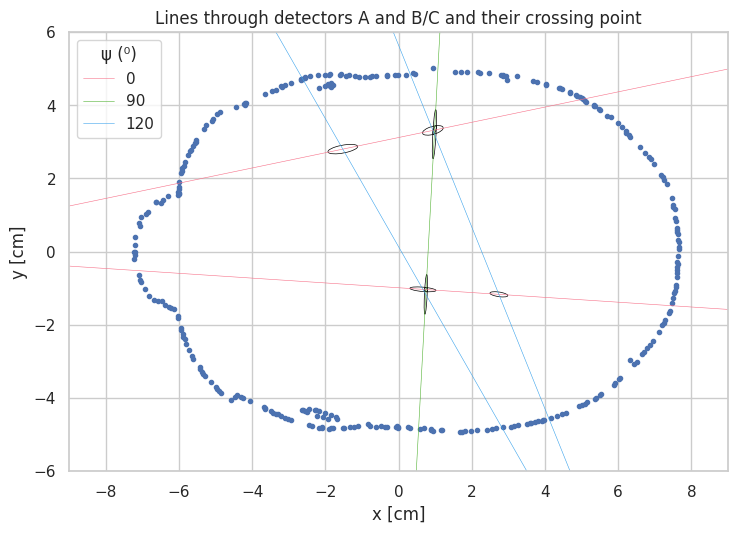

In [26]:
# Solution.

fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.lineplot(data = points_table, x = "x (cm)", y = "y (cm)", hue = "ψ (⁰)", 
             sort = False, palette = sns.color_palette("husl", len(psi_vals)),
            linewidth = 0.4)
ax.scatter(skull_data["x"], skull_data["y"], marker = ".")
cmap = mpl.colormaps["coolwarm"]
colors = cmap(np.linspace(0, 1, len(X_points)))
for xy, color in zip(X_points, colors):
    x, y = xy
    confidence_ellipse(x, y, ax, n_std = 1, edgecolor = "black", linewidth = 0.5)
ax.set_aspect("equal")
plt.xlabel("x [cm]")
plt.xlim([-9, 9])
plt.ylabel("y [cm]")
plt.ylim([-6,6])
plt.legend(title = "ψ (⁰)")
plt.title("Lines through detectors A and B/C and their crossing point")

$\color{red}{\textbf{Úkol:}}$ Odhadněte souřadnice obou zdrojů pozitronů v souřadné soustavě lebky. Navrhněte vhodný způsob, jak toho docílit. Diskutujte vámi zvolený postup, jeho výsledky a přesnost.

Poznámky:
- Pravděpodobně nevidíte přesné trojcestné křižovatky, ale přímky by se měly křížit v malé oblasti. Rozhodněte se, které přímky odpovídají kterému zdroji, a určete polohy obou zdrojů.
- Číselné hodnoty souřadnic všech průsečíků a jejich neurčitosti naleznete v tabulce výše.
- Proveďte váš odhad, přestože metoda Radonovy transformace pravděpodobně poskytne odhad lepší - na konci budete muset oba výsledky porovnat. 
- Pokud v obrázku výše vidíte velmi velké elipsy spolehlivosti, nejpravděpodobnější příčinou je, že jste fitovali součet dvou gaussiánů na data, na která to není vhodné. Vraťte se zpět a nastavte počáteční parametry tak, aby se na rozdělení, na kterém je vidět jen jeden gaussián, fitoval skutečně jen jeden.

---
---
### Radonova transformace
Radonova transformace funkce $g(x,y)$ definované na 2D rovině je

$$
g(p, \tau) = \int_{E^2} g(x,y) \delta(y - px - \tau) dx dy
$$

$g(p,\tau)$ je integrál funkce $g(x,y)$ podél přímky $y = px + \tau$. 

Radonova transformace je lineární zobrazení. Použijeme dvě důležité vlastnosti Radonovy transformace:
1. Obraz bodového zdroje v bodě $(x^*, y^*)$, tj. $g(x,y) = \delta(x - x^*)\delta(y - y^*)$, je přímka $\tau = -x^*p + y^*$ v Radonově rovině, tj. přímka se sklonem $-x^*$ a průsečíkem $y^*$.

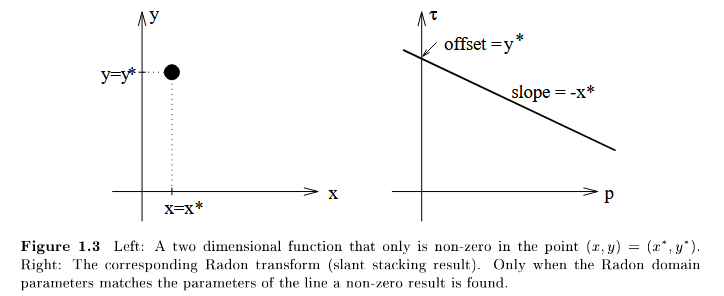

2. Obraz přímky $y = p^*x + \tau^*$ v $E^2$ je bod $(p^*, \tau^*)$ v Radonově rovině. 

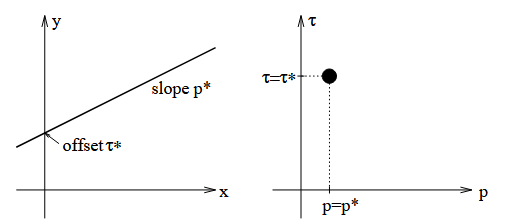

Obě vlastnosti lze snadno dokázat z definice. 

V úkolech výše jsme rekonstruovali několik přímek mezi detektory A, B. Jejich Radonovy transformace budou body a lze je snadno vypočítat. 

Pokud existují dva zdroje, body budou ležet na dvou přímkách - obrazech dvou bodů v $E^2$ představujících polohy obou zdrojů. 

Jelikož nemusí být zřejmé, která dvojice přímek je správná, vyzkoušíme všechny kandidáty a vybereme dvojici, která poskytuje nejlepší fit metodou nejmenších čtverců. Fit implementujeme sami, abychom mohli použít nejistoty náhodných proměnných a získat dobré odhady chyb pro naše výsledky. Implementace je níže.


In [27]:
def least_squares_solution(a1, b1, c1, a2, b2, c2, a3, b3, c3):
    '''
    Given 3 lines, a1*x + b1*y = c1, a2*x + b2*y = c2, a3*x + b3*y = c3, find their intersection 
    in the least-squares sense - that is, solve the system of 3 equations for the unknowns x, y.
    :param a1, ... c3 scalars, coefficients of the 3 equations
    :return (x,y) Least-squares estimates of x, y.
    Note: no least-squares routine is called so that a1, ... c3 can be uncertainties random variables. 
    Note: this only works with 3 lines, that is, measurements from 3 psi values.
    '''
    # Normalize (neutral operation)
    n1 = umath.sqrt(a1**2 + b1**2)
    a1 = a1 / n1
    b1 = b1 / n1
    c1 = c1 / n1
    n2 = umath.sqrt(a2**2 + b2**2)
    a2 = a2 / n2
    b2 = b2 / n2
    c2 = c2 / n2
    n3 = umath.sqrt(a3**2 + b3**2)
    a3 = a3 / n3
    b3 = b3 / n3
    c3 = c3 / n3

    # Compute components of AtA
    M11 = a1**2 + a2**2 + a3**2
    M12 = a1*b1 + a2*b2 + a3*b3
    M21 = M12  # Symmetric matrix
    M22 = b1**2 + b2**2 + b3**2

    # Compute determinant of AtA
    detM = M11 * M22 - M12 * M21

    # Compute Atc
    v1 = a1*c1 + a2*c2 + a3*c3
    v2 = b1*c1 + b2*c2 + b3*c3

    # Compute least-squares solution
    x = (M22 * v1 - M12 * v2) / detM
    y = (-M21 * v1 + M11 * v2) / detM

    chi2 = (c1 - a1*x - b1*y)**2 + (c2 - a2*x - b2*y)**2 + (c3 - a3*x - b3*y)**2

    return x, y, chi2


$\color{red}{\textbf{Úkol:}}$ Sestavte všechny alternativní kombinace bodů/přímek, které reprezentují dva zdroje, a vyberte ty, které dávají nejlepší shodu.


In [28]:
# Solution.

from itertools import permutations


contents = [] # Collecting keys A,B/C of lines for each psi
for psi in psi_vals:
    contents.append(list(lines[psi].keys()))
max_content = len(max(contents, key = len))
slices = [None] * len(psi_vals) # Collecting slices for alternative sets of pq lines
slices[0] = [contents[0]] # No permutation for the first psi
for i_psi in range(1, len(psi_vals)):
    if len(contents[i_psi]) == max_content:
        slices[i_psi] = list(permutations(contents[i_psi]))
    else:
        slices[i_psi] = list(product(contents[i_psi], repeat = max_content)) # if not enough values use product
print("Slices:")
print(slices)

pq_lines = [list(zip(*slice)) for slice in list(product(*slices))] # Combine slices to sets of lines
print("Possible sets of Hough space lines:")
print(pq_lines)

# Fund the set of lines with minimum chi2
min_set_chi2 = np.inf # minimum sum chi2 found for a set of lines
min_set_points = None
for ils, line_set in enumerate(pq_lines):
    total_chi2 = 0
    point_set = []
    for line in line_set:
        pq_points = []
        for i, psi in enumerate(psi_vals):
            a, b, c = lines[psi][line[i]]
            p = -a/b # Radon transform the line
            q = c/b
            pq_points.extend([p, 1, q])
        slope, intercept, chi2 = least_squares_solution(*pq_points)  # fit line in pq space
        total_chi2 += chi2  # chi2 as rv, we take mean later
        xy_point = (-slope, intercept)  # back to xy space
        point_set.append((*xy_point, chi2))
    if total_chi2.nominal_value < min_set_chi2:
        min_set_chi2 = total_chi2.nominal_value
        min_set_points = point_set.copy()
print("Minimum chi2 set:")
print(f"{min_set_chi2=}")
for x, y, chi2 in min_set_points:
    print(f"{x.nominal_value:.2f} +/- {x.std_dev:.2f}, {y.nominal_value:.2f} +/- {y.std_dev:.2f}, {chi2.nominal_value:.2f}")
    


Slices:
[[['AB', 'AC']], [('AB', 'AB')], [('AB', 'AC'), ('AC', 'AB')]]
Possible sets of Hough space lines:
[[('AB', 'AB', 'AB'), ('AC', 'AB', 'AC')], [('AB', 'AB', 'AC'), ('AC', 'AB', 'AB')]]
Minimum chi2 set:
min_set_chi2=0.0036158974333058503
0.72 +/- 0.13, -1.05 +/- 0.09, 0.00
0.96 +/- 0.14, 3.31 +/- 0.14, 0.00


$\color{red}{\textbf{Úkol:}}$ Vše vykreslete a udělejte pěknou tabulku.


Text(0.5, 1.0, 'Lines through detectors A and B/C in Hough space')

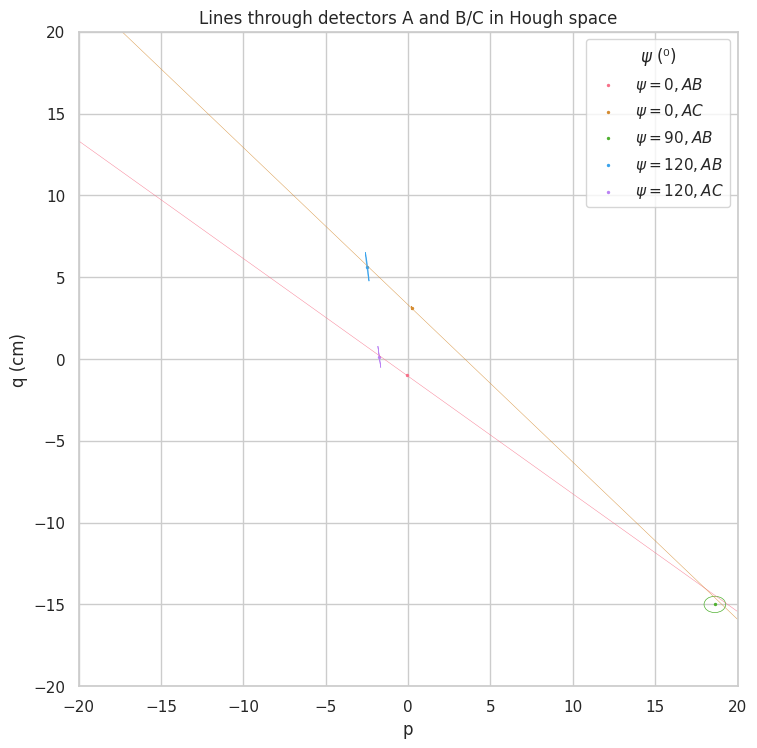

In [29]:
# Solution.

fig, ax = plt.subplots(figsize = [8.5, 8.5])
colors = sns.color_palette("husl", 3*len(psi_vals))
colors_1 = colors[::3]
colors_2 = colors[1::3]
for psi, color1, color2 in zip(psi_vals, colors_1, colors_2):
    a, b, c = lines[psi]["AB"]
    p = - a / b # slope, x-coordinae in Radon space
    tau = c / b # y-intercept, y-coordinate in Radon space
    plt.scatter([p.nominal_value], [tau.nominal_value], color = color1, s = 2, label = f"$\\psi = {psi}, AB$")
    confidence_ellipse(p, tau, ax, n_std = 1, edgecolor = color1, linewidth = 0.5)
    try:
        a, b, c = lines[psi]["AC"]
        p = - a / b
        tau = c / b
        plt.scatter([p.nominal_value], [tau.nominal_value], color = color2, s = 2, label = f"$\\psi = {psi}, AC$")
        confidence_ellipse(p, tau, ax, n_std = 1, edgecolor = color2, linewidth = 0.5)
    except KeyError:
        continue
point_set_colors = sns.color_palette("husl", len(min_set_points))
for i, (x, y, chi2) in enumerate(min_set_points):
    slope = -x.nominal_value
    intercept = y.nominal_value
    plt.axline((0, intercept), slope = slope, linewidth = 0.3, color = colors[i])
#ax.set_aspect("equal")
plt.xlabel("p")
plt.xlim(-20, 20)
plt.ylabel("q (cm)")
plt.ylim(-20, 20)
plt.legend(title = "$\\psi$ (⁰)")
plt.title("Lines through detectors A and B/C in Hough space")

Text(0.5, 1.0, 'Radon transform estimates of source positions')

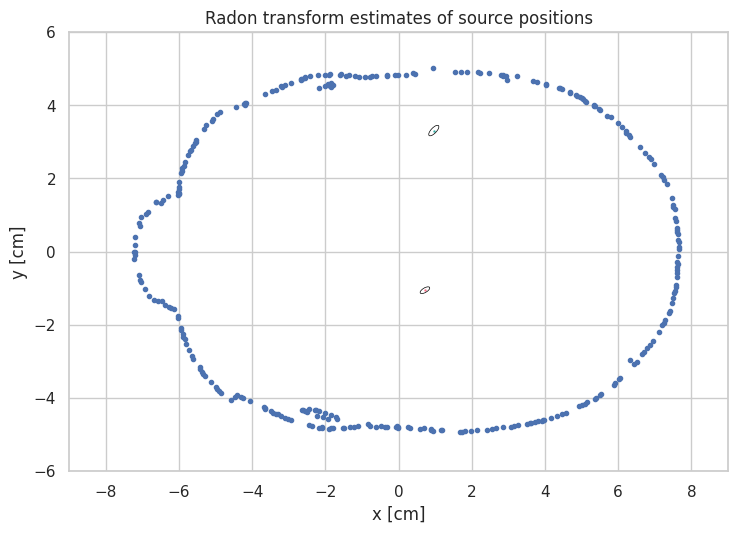

In [30]:
# Solution.

fig, ax = plt.subplots(figsize = [8.5, 8.5])
ax.scatter(skull_data["x"], skull_data["y"], marker = ".")
point_set_colors = sns.color_palette("husl", len(min_set_points))
for i, (x, y, chi2) in enumerate(min_set_points):
    plt.scatter([x.nominal_value], [y.nominal_value], s = 0.5, color = point_set_colors[i])
    confidence_ellipse(x, y, ax, n_std = 1, edgecolor = "black", linewidth = 0.5)
ax.set_aspect("equal")
plt.xlabel("x [cm]")
plt.xlim([-9, 9])
plt.ylabel("y [cm]")
plt.ylim([-6,6])
plt.title("Radon transform estimates of source positions")

In [31]:
# Solution.

rows = []
for x, y, chi2 in min_set_points:
    rho = correlation_matrix([x, y])[0,1]
    rows.append({
        "x (cm)" : x.nominal_value,
        "𝑠ₓ (cm)" : x.std_dev,
        "y (cm)" : y.nominal_value,
        "𝑠ᵧ (cm)" : y.std_dev,
        "ρ" : rho
    })
radon_table = pd.DataFrame.from_records(rows)
radon_table.style.format(precision = 2).set_caption("Estimated position of sources by Radon transform")

,x (cm),𝑠ₓ (cm),y (cm),𝑠ᵧ (cm),ρ
0,0.72,0.13,-1.05,0.09,0.66
1,0.96,0.14,3.31,0.14,0.73


$\color{red}{\textbf{Úkol:}}$ Diskutujte provedené měření. Odpovězte mj. na následující otázky:
- Jaká je přesnost měření? Můžeme se spolehnout na neurčitosti parametrů fitů?
- Pokud byl první zdroj pozitronů ponechán na místě od prvního měření: jsou pozice z prvního a druhého měření konzistentní?
- Je výsledek konzistentní s odhadem průsečíků přímek založeným na rýsování na papír?
- Požádejte instruktora, aby pro vás otevřel model lebky. Pomocí pravítka změřte skutečné polohy pozitronových zdrojů. Odpovídají vaše měření realitě?
- Jak můžeme zlepšit přesnost/identifikaci? Co byste zvolili pro lepší odhad přesnosti měření:
    - Přidat další úhlové rozdělení (měření při jiném $\psi$), nebo
    - Měřit úhlová rozdělení důkladněji (delší doba akvizice, menší úhlový krok)?
    - nebo další zlepšení?
- Co kdybychom měli více zdrojů záření? Jaký je rozumný horní limit počtu zdrojů, jejichž polohy můžeme současně měřit?

$\color{red}{\textbf{Řešení:}}$

$\color{red}{\textbf{Úkol:}}$ Sepište závěr.

$\color{red}{\textbf{Řešení:}}$

# Závěr